<a href="https://colab.research.google.com/github/dannyhaUTS/41043_NLP_2024/blob/main/NLP_AT3_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 2.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
pip install transformers[torch]

In [ ]:
pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 983.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 27.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
import numpy as np
import pandas as pd
import evaluate
from sklearn.model_selection import train_test_split
import re
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer
from transformers import BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/Phishing_Email.csv')

In [ ]:
dataset.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
dataset.isnull().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [ ]:
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

In [ ]:
dataset['Email_Text'] = dataset['Email Text'].apply(clean_text)

In [ ]:
label_encoder = LabelEncoder()
dataset['Email_Type'] = label_encoder.fit_transform(dataset['Email Type'])

In [ ]:
dataset.isnull().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
Email_Text     0
Email_Type     0
dtype: int64

In [ ]:
dataset.head()

,Unnamed: 0,Email Text,Email Type,Email_Text,Email_Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,re 6 1100 disc uniformitarianism re 1086 sex l...,1
1,1,the other side of * galicismos * * galicismo *...,Safe Email,the other side of galicismos galicismo is a sp...,1
2,2,re : equistar deal tickets are you still avail...,Safe Email,re equistar deal tickets are you still availab...,1
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,hello i am your hot lil horny toy i am the on...,0
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email,software at incredibly low prices 86 lower dra...,0


In [ ]:
train_texts, temp_texts, train_labels, temp_labels = train_test_split(dataset['Email_Text'], dataset['Email_Type'], test_size=0.3, random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=0.5, random_state=42)

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
tokenize_train_dataset = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=512)
tokenize_val_dataset = tokenizer(val_texts.tolist(), truncation=True, padding=True, max_length=512)
tokenize_test_dataset = tokenizer(test_texts.tolist(), truncation=True, padding=True, max_length=512)

In [ ]:
class ConvertToEmailDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
train_dataset = ConvertToEmailDataset(tokenize_train_dataset, train_labels.tolist())
val_dataset = ConvertToEmailDataset(tokenize_val_dataset, val_labels.tolist())
test_dataset = ConvertToEmailDataset(tokenize_test_dataset, test_labels.tolist())

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(set(dataset['Email_Type'])))

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
args = TrainingArguments(
    output_dir='/content/results',
    learning_rate=2e-5,
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='/content/logs',
    evaluation_strategy = "epoch",
    logging_strategy="epoch"
)

BertModel = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
BertModel.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.205600,0.089446,0.973901
2,0.063900,0.077348,0.981766
3,0.037600,0.090985,0.979979
4,0.026700,0.095973,0.982839
5,0.027100,0.086730,0.982839


TrainOutput(global_step=8160, training_loss=0.07218633960275089, metrics={'train_runtime': 6707.9676, 'train_samples_per_second': 9.731, 'train_steps_per_second': 1.216, 'total_flos': 1.7174574138624e+16, 'train_loss': 0.07218633960275089, 'epoch': 5.0})

In [ ]:
results = BertModel.evaluate()
print(results)

{'eval_loss': 0.08672962337732315, 'eval_accuracy': 0.9828387558097962, 'eval_runtime': 97.1363, 'eval_samples_per_second': 28.795, 'eval_steps_per_second': 1.802, 'epoch': 5.0}


In [ ]:
test_results = BertModel.evaluate(test_dataset)
print(test_results)

{'eval_loss': 0.13166220486164093, 'eval_accuracy': 0.9781987133666905, 'eval_runtime': 93.3452, 'eval_samples_per_second': 29.975, 'eval_steps_per_second': 1.875, 'epoch': 5.0}


In [ ]:
BertModel.save_model('/content/BertModel')

In [ ]:
saved_model = model.from_pretrained('/content/BertModel')

In [ ]:
new_texts = ['new book japanese linguistics japanese linguistics hamano shoko the george washington university the sound symbolic system of japanese isbn 1 57586 144 5 paper 1 57586 144 5 cloth csli publications 1998 http csli www stanford edu publications email pubs roslin stanford edu this book is the first theoretical study of sound symbolic expressions in japanese commonly known as mimetic words it identifies stringent linguistic constraints on these expressions and demonstrates that they form an intricate linguistic system rather than a collection of ad hoc expressions it then carefully identifies the sound symbolic meanings of sound units so as to make the elusive meaning of each sound symbolic expression fully comprehensible in addition this book describes a number of interesting facts about the history of the japanese language which mimetic words reveal csli publications ventura hall stanford university stanford ca 94305 4115 telephone 650 723 1839 fax 650 725 2166 http csli www stanford edu publications',
             'hot stock tip your broker won t share now that oi and gas has entered a long term bul market our speciaity in pinpointing the hottest companies of the few remaining undervaiued energy piays has produced soaring returns montana oi and gas inc mogi to expiore further opportunities in alberta canada a is an energy developer in canada s most highly coveted reservoirs with generating potentia of mi ions per week symbo mogi price 47 increased 11 last three day rating strongbuy how much it wiil up again the vaiue of mogi s shares wil skyrocket 1 price charts confirm oi prices are experiencing the strongest bul market in a generation 2 natural gas prices have tripled in the ast two years 3 with multiple projects in high gear and the expanding production on reserves worth muiti miilions mogi is seiling for ess than 1 4 the vaiue of its assets 4 montana oil and gas specializes in using new technoiogy to turn unproductive oil and gas deposits into profitable enterprises aiready shares in the oil and gas sector are rising faster than the overa market']

new_text_tokenize = tokenizer(new_texts, truncation=True, padding=True, max_length=512)

class PredictDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings.input_ids)

new_dataset = PredictDataset(new_text_tokenize)
predictions = BertModel.predict(new_dataset)

predicted_labels = label_encoder.inverse_transform(predictions.predictions.argmax(-1))
print(predicted_labels)

['Safe Email' 'Phishing Email']


In [ ]:
test_texts.sample(5)

13093    bro check out this awesome new product wish yo...
18577                                                empty
7138     italian crafted rolex from 75 to 275 free ship...
14316    re 3 396 chomsky citations i think that the la...
18050    humanities computing position at ceth the cent...
Name: Email_Text, dtype: object

In [ ]:
dataset.iloc[13093]

Unnamed: 0                                                13094
Email Text    bro check out this awesome new product wish yo...
Email Type                                       Phishing Email
Email_Text    bro check out this awesome new product wish yo...
Email_Type                                                    0
Name: 13093, dtype: object

In [ ]:
print(dataset['Email_Text'].iloc[13093]) # 0

bro check out this awesome new product wish you could be better http www gretan com ss a cheerful mind is a vigorous mind war is god s way of teaching americans geography all human power is a compound of time and patience strive for excellence not perfection if you re killed you ve lost a very important part of your life 


In [ ]:
dataset.iloc[14316]

Unnamed: 0                                                14317
Email Text    re : 3 . 396 chomsky citations i think that th...
Email Type                                           Safe Email
Email_Text    re 3 396 chomsky citations i think that the la...
Email_Type                                                    1
Name: 14316, dtype: object

In [ ]:
print(dataset['Email_Text'].iloc[14316]) # 1

re 3 396 chomsky citations i think that the large number of chomsky citations in linguistics is unfortunately due largely to the authoritarian nature of the chomsky spawned linguistics that gets done theory is simply not acceptable until it has received the imprimatur of chomsky by his penning an essay or book which incorporates a student s or accolyte s idea this is not so much an impugnment of chomsky i personally think he is a great linguist and political observer it is rather an impugnment of the chomsky disciples i gather that the ship of modern generative linguistics is so terribly tossed in the gales of what counts as science that every hand looks to the captain for guidance and so too often the captain wears a halo i think that chomsky would be cited less if linguistics was either more of a science than it is or at least more than its practitioners seem to believe 


In [ ]:
new_texts = [ 'bro check out this awesome new product wish you could be better http www gretan com ss a cheerful mind is a vigorous mind war is god s way of teaching americans geography all human power is a compound of time and patience strive for excellence not perfection if you re killed you ve lost a very important part of your life ' ,
             're 3 396 chomsky citations i think that the large number of chomsky citations in linguistics is unfortunately due largely to the authoritarian nature of the chomsky spawned linguistics that gets done theory is simply not acceptable until it has received the imprimatur of chomsky by his penning an essay or book which incorporates a student s or accolyte s idea this is not so much an impugnment of chomsky i personally think he is a great linguist and political observer it is rather an impugnment of the chomsky disciples i gather that the ship of modern generative linguistics is so terribly tossed in the gales of what counts as science that every hand looks to the captain for guidance and so too often the captain wears a halo i think that chomsky would be cited less if linguistics was either more of a science than it is or at least more than its practitioners seem to believe ']

new_text_tokenize = tokenizer(new_texts, truncation=True, padding=True, max_length=512)

class PredictDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings.input_ids)

new_dataset = PredictDataset(new_text_tokenize)
predictions = BertModel.predict(new_dataset)

predicted_labels = label_encoder.inverse_transform(predictions.predictions.argmax(-1))
print(predicted_labels)

['Phishing Email' 'Safe Email']


In [ ]:
new_text_tokenize = tokenizer(test_texts.tolist(), truncation=True, padding=True, max_length=512)

class PredictDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings.input_ids)

new_dataset = PredictDataset(new_text_tokenize)
predictions = BertModel.predict(new_dataset)

predicted_labels = label_encoder.inverse_transform(predictions.predictions.argmax(-1))
print(predicted_labels)

['Safe Email' 'Phishing Email' 'Safe Email' ... 'Safe Email' 'Safe Email'
 'Safe Email']


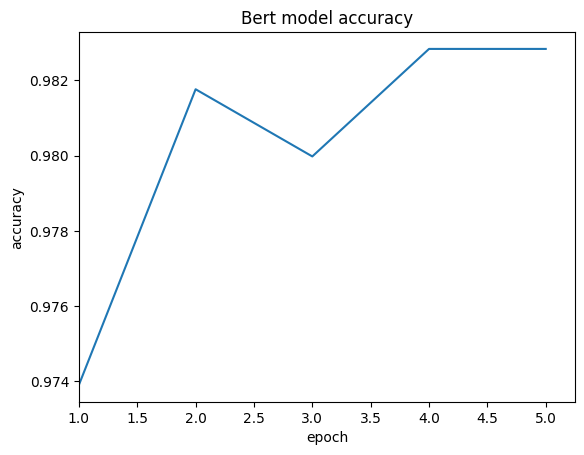

In [ ]:
accuracy = [0.973901, 0.973901, 0.981766, 0.979979, 0.982839, 0.982839]

plt.plot(accuracy)
plt.title('Bert model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xlim(1)
plt.show()

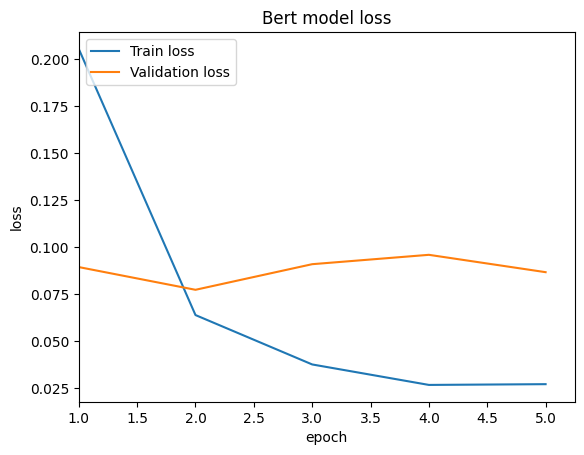

In [ ]:
training_loss = [0.205600, 0.205600, 0.063900, 0.037600, 0.026700, 0.027100	]
validation_loss = [0.089446, 0.089446, 0.077348, 0.090985, 0.095973, 0.086730]

plt.plot(training_loss)
plt.plot(validation_loss)
plt.title('Bert model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xlim(1)
plt.legend(['Train loss', 'Validation loss'], loc='upper left')
plt.show()